<a href="https://colab.research.google.com/github/chohyungrae/Machine-Learning-Deep-Learning-Code-Learning/blob/master/AND%2C_OR%2C_XOR_%EC%97%B0%EC%82%B0_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 

def sigmoid(x): 
  return 1/(1+np.exp(-x))

### **AND 연산 네트워크**

- 항상 참일때만 참을 출력

In [ ]:
from pandas import Series, DataFrame
import pandas as pd

In [ ]:
# AND를 표로 나타내보면
# pandas로 테이블 만들기
data ={'input1': ['1','1','0','0'],
       'input2': ['1','0','1','0'],
       'AND': ['1','0','0','0']}
frame = DataFrame(data)
frame

,input1,input2,AND
0,1,1,1
1,1,0,0
2,0,1,0
3,0,0,0


In [ ]:
# numpy 배열로 나타내면 아래와 같이 선언
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]]) 
y = np.array([[1], [0], [0], [0]])
x+y

array([[2, 2],
       [1, 0],
       [0, 1],
       [0, 0]])

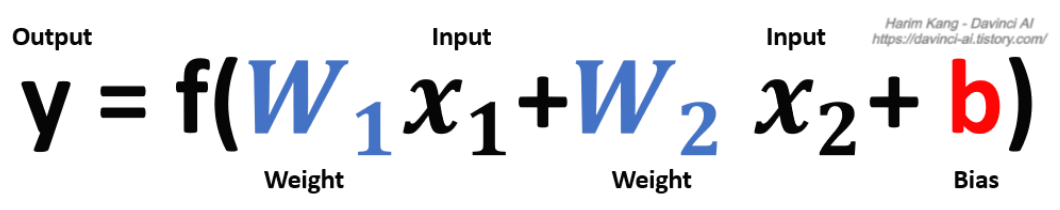

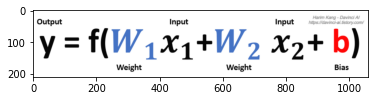

In [ ]:
'''
가중치와 편향도 정규 분포를 가지는 난수로 초기화 해준다.
또한, 학습률은 0.1로 설정.
이때 아래의 공식과 같이 input값이 두개이므로, 
가중치도 각각 두개를 선언해준다.
'''
# 파이썬에서 이미지 불러오기
# Matplotlib 사용
import matplotlib.pyplot as plt

a = plt.imread('/content/and공식.png')
plt.imshow(a) # 흑백으로 보고 싶을 땐, plt.imshow(a, cmap='gray')
# a를 출력하게 되면 숫자 array가 나오고, 만약 사진을 출력하고 싶다면 plt.imshow를 사용한다.


# Pillow 사용
import PIL.Image as pilimg

a = pilimg.open('/content/and공식.png')
a
#이 때, Maplotlib와 다른 점은 plt.imread는 array로 불러온다면, 
#Piling.open은 이미지 자체를 불러오기 때문에 a를 출력하면 이미지 자체가 뜨게 된다.

In [ ]:
import tensorflow as tf 
w = tf.random.normal([2], 0, 1) 
b = tf.random.normal([1], 0, 1) 
a = 0.1

In [ ]:
# 이제 학습시작! 
#편향을 가진 뉴런처럼 코드를 구성
#각각 네가지 경우를 한번씩 학습할 때마다, 
#네가지 를 예측한 값과 실제 값의 차이인 error값의 합을 구함
for i in range(10000): 
  error_sum = 0 
  for j in range(4): 
    output = sigmoid(np.sum(x[j]*w)+b) 
    error = y[j][0] - output 
    w = w + x[j] * a * error 
    b = b + a * error                           
    error_sum += error 
    
    if i % 1000 == 999: 
      print(i, error_sum)

# 학습을 진행할수록 0에 가까운 error값을 확인할 수 있다.

999 [0.06697768]
999 [0.01926183]
999 [-0.02851008]
999 [-0.02868607]
1999 [0.03478938]
1999 [0.00996607]
1999 [-0.0148722]
1999 [-0.01489527]
2999 [0.02339613]
2999 [0.00669586]
2999 [-0.01001124]
2999 [-0.0100181]
3999 [0.01759845]
3999 [0.00503303]
3999 [-0.00753616]
3999 [-0.00753904]
4999 [0.01409549]
4999 [0.00403046]
4999 [-0.00603703]
4999 [-0.0060385]
5999 [0.01175141]
5999 [0.00335978]
5999 [-0.00503356]
5999 [-0.0050344]
6999 [0.01007366]
6999 [0.0028798]
6999 [-0.00431531]
6999 [-0.00431584]
7999 [0.00881404]
7999 [0.00251961]
7999 [-0.00377578]
7999 [-0.00377614]
8999 [0.0078336]
8999 [0.00223917]
8999 [-0.00335605]
8999 [-0.00335629]
9999 [0.00704896]
9999 [0.00201474]
9999 [-0.00302011]
9999 [-0.00302029]


In [ ]:
# 학습시켜서 나온 가중치와 편향을 사용하여 각각의 케이스를 예측
for i in range(4): 
  print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

# 실제로 1이 나와야하는 값은 1에 가깝게, 
# 0에 가까워야하는 값은 0에 가깝게 예측이 되었습니다. 
# [0 0] 케이스의 경우에는 다른 케이스들 보다 더 0에 가까운걸로 보아 
# 더 확실한 케이스라는 점을 알 수 있습니다.

X: [1 1] Y: [1] Output: [0.9929517]
X: [1 0] Y: [0] Output: [0.00502667]
X: [0 1] Y: [0] Output: [0.00502981]
X: [0 0] Y: [0] Output: [1.8128655e-07]


### **OR 연산 네트워크**

- 하나라도 참이라면 결과가 참


In [ ]:
# OR를 표로 나타내보면
# pandas로 테이블 만들기
data ={'input1': ['1','1','0','0'],
       'input2': ['1','0','1','0'],
       'OR': ['1','1','1','0']}
frame = DataFrame(data)
frame

,input1,input2,OR
0,1,1,1
1,1,0,1
2,0,1,1
3,0,0,0


In [ ]:
# numpy로 표시
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]]) 
y = np.array([[1], [1], [1], [0]])
x+y


array([[2, 2],
       [2, 1],
       [1, 2],
       [0, 0]])

In [ ]:
#가중치와 편향과 학습률 및 학습 코드는 AND연산과 똑같다.
#학습을 시키면 결과는 아래와 같다.
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[1], [1], [1], [0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
a = 0.1

for i in range(10000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b)
    error = y[j][0] - output
    w = w + x[j] * a * error
    b = b + a * error
    error_sum += error
  
  if i % 1000 == 999:
    print(i, error_sum)
# 각각 네가지 경우를 한번씩 학습할 때마다, 
# 네가지 를 예측한 값과 실제 값의 차이인 error값의 합을 구함
# 학습을 진행할수록 0에 가까운 error값을 확인할 수 있다.

999 [-0.00963388]
1999 [-0.00495868]
2999 [-0.00332941]
3999 [-0.00250395]
4999 [-0.00200551]
5999 [-0.00167226]
6999 [-0.0014339]
7999 [-0.00125486]
8999 [-0.00111531]
9999 [-0.00100384]


In [ ]:
# 학습시켜서 나온 가중치와 편향을 사용하여 각각의 케이스를 예측
for i in range(4): 
  print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

# [1 1] 케이스의 경우에는 확실하게 1이라고 단정
# [0 0] 케이스는 0에 가깝고 
# 나머지 케이스들은 1에 가까운걸로 보아 잘 학습이 되었다.

X: [1 1] Y: [1] Output: [1.]
X: [1 0] Y: [1] Output: [0.99799585]
X: [0 1] Y: [1] Output: [0.9979944]
X: [0 0] Y: [0] Output: [0.00501107]


### **XOR 연산 네트워크**

- XOR은 홀수 개의 입력이 참일 때, 결과가 참  

In [ ]:
# XOR를 표로 나타내보면
# pandas로 테이블 만들기
data ={'input1': ['1','1','0','0'],
       'input2': ['1','0','1','0'],
       'XOR': ['0','1','1','0']}
frame = DataFrame(data)
frame

,input1,input2,XOR
0,1,1,0
1,1,0,1
2,0,1,1
3,0,0,0


In [ ]:
#가중치와 편향과 학습률 및 학습 코드는 AND연산과 똑같다.
#학습을 시키면 결과는 아래와 같다.
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[0], [1], [1], [0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
a = 0.1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b)
    error = y[j][0] - output
    w = w + x[j] * a * error
    b = b + a * error
    error_sum += error
  
  if i % 200 == 99:
    print(i, error_sum)
# 특정 학습 지점부터 에러 값이 0이 나와 버리고 있다. 
# 이것이 과연 학습이 잘된걸까요? 

99 [0.01955274]
299 [0.00079548]
499 [3.2305717e-05]
699 [1.3113022e-06]
899 [5.9604645e-08]
1099 [0.]
1299 [0.]
1499 [0.]
1699 [0.]
1899 [0.]


In [ ]:
# 학습시켜서 나온 가중치와 편향을 사용하여 각각의 케이스를 예측
for i in range(4):
  print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

# 결과가 0이 나와야하든지, 1이 나와야하든지 해야하는데
# 모든 케이스가 0.5에 가깝게 나오고 있다. 
# 이것은 원하던 결과가 아니다.

X: [1 1] Y: [0] Output: [0.5128176]
X: [1 0] Y: [1] Output: [0.5128176]
X: [0 1] Y: [1] Output: [0.5]
X: [0 0] Y: [0] Output: [0.5]


In [ ]:
'''
결과를 해석해보자면, 가중치와 편향 값은 모두 케이스 순서에 의존적이 
된다는 것을 알 수 있다. 먼저 들어간 [1 1]이라는 케이스가 
네번째에 들어가는 [0 0]이라는 케이스보다 영향을 준다는 것이다. 
[1 1]이라는 케이스가 먼저 들어가서 가중치와 편향에 중대한 영향을 미치고 
이 값들을 가지고 학습을 진행한다는 것이 문제!
'''
print('w:', w)
print('b:', b)

w: tf.Tensor([5.1281884e-02 1.2293458e-07], shape=(2,), dtype=float32)
b: tf.Tensor([-1.527369e-07], shape=(1,), dtype=float32)


위와 같은 이유로 가중치를 살펴보니, 
- 첫번째와 두번째 가중치 모두 0에 가깝게 비슷한 수치를 나타내고 있다. 중요도가 어떤 것이 더 높은지 알지못한다는 의미. 
- 편향 또한 영향이 미비해질 만큼 작은 수치를 나타내고 있다. 이러한 이유들로 인하여 XOR문제가 생긴다.

- 인공 신경망에서는 단층 퍼셉트론으로 XOR 연산이 불가능하다는 것은 마빈 민스키 등에 의해서 밝혀졌다. 이러한 내용이 밝혀지면서 인공지능의 겨울이 찾아왔었다.

- 그러면 XOR문제는 풀지 못하는 걸까요? 여러 층의 퍼셉트론을 사용하면 해결이 된다.


### **다층 XOR 연산 신경망**

- 다층 구조의 신경망 설계

1) 2단의 Dense Layer로 구성

2) Dense는 기본적인 레이어로, 입력과 출력 사이에 있는 모든 뉴런이 서로 연결되어 있는 레이어



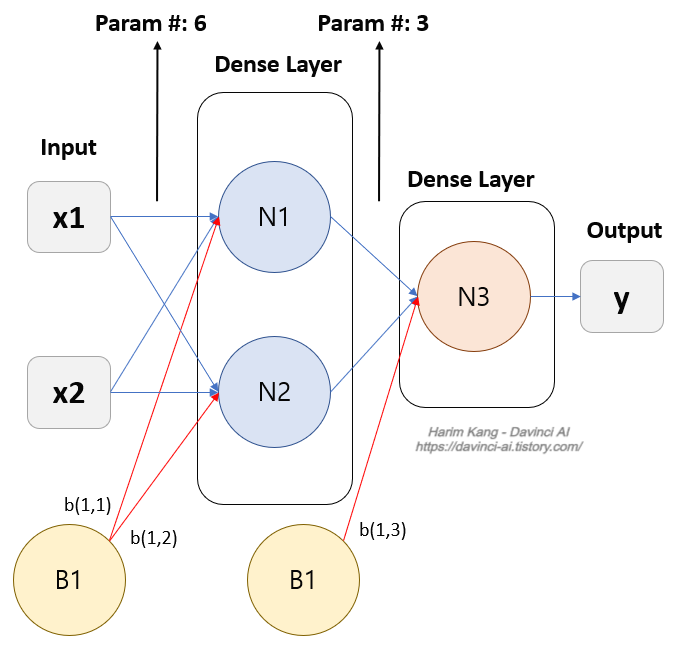

In [ ]:
# Pillow 사용
import PIL.Image as pilimg

a = pilimg.open('/content/다층신경망.png')
a
#이 때, Maplotlib와 다른 점은 plt.imread는 array로 불러온다면, 
#Piling.open은 이미지 자체를 불러오기 때문에 a를 출력하면 이미지 자체가 뜨게 된다.

In [ ]:
'''
2단의 Dense Layer로 구성.
Dense는 기본적인 레이어로, 입력과 출력 사이에 있는 모든 뉴런이 서로 연결되어 있는 레이어

XOR연산이므로, x와 y값은 그대로 이다.
'''
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[0], [1], [1], [0]])



In [ ]:
'''
각각의 Layer는 순차적으로 배치되어있다.
이를 Sequential 신경망이라고 하고 아래와 같이 선언
tf.keras.Sequential()

Sequential한 Dense Layer를 2층으로 쌓는다.
'''
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
                             tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# 순차적인 신경망안에 두개의 Dense Layer를 배치하고, 
# 첫번째 Dense Layer는 2개의 뉴런을 선언하였고, 
# 각 뉴런은 sigmoid를 활성함수로 가진다. 
# 입력 값은 두개이므로 모양이 (2,) 모양이다. 
# 두번째 Dense Layer는 1개의 뉴런을 선언하고, 마찬가지로 sigmoid 활성함수를 사용


In [ ]:
# model을 준비시키는 명령어를 사용하여 최적화 함수(optimizer)와 손실 함수(loss)를 정의
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')


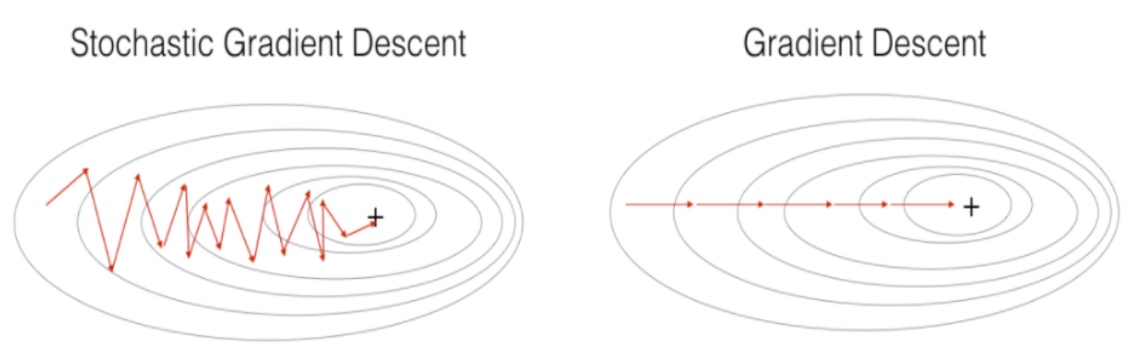

In [ ]:
import PIL.Image as pilimg

b = pilimg.open('/content/최적화함수.png')
b


In [ ]:
'''
형성된 신경망의 구조를 살펴보자.
- 파라미터는 첫번째 Layer에서 입력값들이 뉴런에 전달되는 2*2개인 4개에 편향이 
각 뉴런에 전달되어 총 6개
- 두번째 Layer에서는 첫 Layer에서 나온 출력 값 두개와 편향을 합쳐서 
총 3개의 값이 두번째 층에 전달되어 결과적으로 하나의 출력 값이 나오게 된다.

'''

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 학습 시작
# x와 y변수들을 전달하여 학습데이터로 사용하고, 2000번 반복한다는 의미

history = model.fit(x, y, epochs=2000, batch_size=1)

Epoch 1/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2837
Epoch 2/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2806
Epoch 3/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2778
Epoch 4/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2750
Epoch 5/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2726
Epoch 6/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2704
Epoch 7/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2685
Epoch 8/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2667
Epoch 9/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2651
Epoch 10/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2636
Epoch 11/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2623
Epoch 12/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2612
Epoch 13/2000
4/4 [==============================

In [ ]:
# 제대로 학습이 되었는지 확인
# 정답은 0, 1, 1, 0 순서이다. 
# 각각 0과 1에 해당하는 수에 가깝게 나오고 있는것을 확인 할 수 있다. 
# 이는 학습을 더 많이 할수록 더 정답에 해당하는 수치로 갈것 이다.

model.predict(x)

array([[0.5976203 ],
       [0.67255306],
       [0.67640674],
       [0.12357682]], dtype=float32)

In [ ]:
# 가중치(weight)와 편향(bias)값을 확인
# 단층의 연산 신경망에 비해 가중치와 편향 값이 0에 가깝지 않고 뚜렷한 것을 확인

for weight in model.weights:
  print(weight)

<tf.Variable 'dense_14/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-4.9061494, -1.1749244],
       [-4.907029 , -1.1355702]], dtype=float32)>
<tf.Variable 'dense_14/bias:0' shape=(2,) dtype=float32, numpy=array([0.72786856, 0.6050871 ], dtype=float32)>
<tf.Variable 'dense_15/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-4.8930364],
       [ 1.9155059]], dtype=float32)>
<tf.Variable 'dense_15/bias:0' shape=(1,) dtype=float32, numpy=array([0.10158499], dtype=float32)>
